# Accessing SCoPe online
This notebook will go over how to use the `scope_client` class to access the SCoPe catalogs.

1. [initalize](#1)
2. [`cone_search` and `cone_searches`](#2)
3. [`ids_search`](#3)
4. [`search_by_classification` and `search_by_features`](#4)
5. [Plot classifications](#5)
6. [CMD example](#6)

## <a id="1"></a> 1. Initalize `scope_client`

`scope_client` is built on top of `Kowalski` so it needs the same credetials. The tables for SCoPe all live on `gloria` so it is the only nessecary host. Adding other hosts will not break the code.

In [17]:
from SCoPe_db import scope_client
import yaml
import numpy as np
timeout = 120
tokens={'gloria':'YOUR TOKEN HERE',}

with open('secure.yaml','r') as f:
    tokens=yaml.load(f, Loader=yaml.FullLoader)
hosts = ['gloria']
instances = {
    host: {
        'protocol': 'https',
        'port': 443,
        'host': f'{host}.caltech.edu',
        'token': tokens[host],
    }
    for host in hosts
}
C=scope_client(tokens,hosts,time_out=timeout)

`ZTF_source_features_DR16` and `ZTF_source_classifications_DR16` are the two tables that make up the SCoPe catalog. `ZTF_source_classifications_DR16` contains all of the classifications for all of the lightcurves (the same as the Zenodo repo). `ZTF_source_features_DR16` has the feautes computed that were used to compute the classifications. Not all columns are as useful as each other. Built into `scope_client` is a list of preselected columns ro be returned in all queries.

In [4]:
#columns used for ZTF_source_classifications_DR16
print(C.classification_keys)

['_id', 'ra', 'dec', 'period', 'field', 'ccd', 'quad', 'filter', 'e_dnn', 'dscu_dnn', 'dp_dnn', 'mir_dnn', 'rrc_dnn', 'agn_dnn', 'puls_dnn', 'bogus_dnn', 'rscvn_dnn', 'wvir_dnn', 'lpv_dnn', 'rrlyr_dnn', 'rrd_dnn', 'emsms_dnn', 'mp_dnn', 'ew_dnn', 'bis_dnn', 'blher_dnn', 'srv_dnn', 'fla_dnn', 'i_dnn', 'ceph2_dnn', 'ea_dnn', 'wuma_dnn', 'rrblz_dnn', 'ceph_dnn', 'osarg_dnn', 'ext_dnn', 'bright_dnn', 'el_dnn', 'dip_dnn', 'vnv_dnn', 'cv_dnn', 'pnp_dnn', 'sin_dnn', 'blend_dnn', 'eb_dnn', 'wp_dnn', 'rrab_dnn', 'hp_dnn', 'blyr_dnn', 'saw_dnn', 'longt_dnn', 'yso_dnn', 'blend_xgb', 'hp_xgb', 'bis_xgb', 'wp_xgb', 'eb_xgb', 'ceph_xgb', 'bright_xgb', 'wuma_xgb', 'longt_xgb', 'rrd_xgb', 'ceph2_xgb', 'osarg_xgb', 'rrblz_xgb', 'blyr_xgb', 'ea_xgb', 'lpv_xgb', 'agn_xgb', 'el_xgb', 'e_xgb', 'rrab_xgb', 'cv_xgb', 'mir_xgb', 'rrc_xgb', 'mp_xgb', 'yso_xgb', 'wvir_xgb', 'saw_xgb', 'puls_xgb', 'ew_xgb', 'sin_xgb', 'blher_xgb', 'dscu_xgb', 'dp_xgb', 'vnv_xgb', 'pnp_xgb', 'bogus_xgb', 'dip_xgb', 'i_xgb', 'rscv

In [5]:
#columns used for ZTF_source_features_DR16
print(C.features_keys)

['_id', 'mean', 'amplitude', 'period_ELS', 'significance_ELS', 'period_ECE', 'significance_ECE', 'period_EAOV', 'significance_EAOV', 'period_ELS_ECE_EAOV', 'significance_ELS_ECE_EAOV', 'AllWISE___id', 'AllWISE__w1mpro', 'AllWISE__w1sigmpro', 'AllWISE__w2mpro', 'AllWISE__w2sigmpro', 'AllWISE__w3mpro', 'AllWISE__w3sigmpro', 'AllWISE__w4mpro', 'AllWISE__w4sigmpro', 'AllWISE__ph_qual', 'Gaia_EDR3___id', 'Gaia_EDR3__phot_g_mean_mag', 'Gaia_EDR3__phot_bp_mean_mag', 'Gaia_EDR3__phot_rp_mean_mag', 'Gaia_EDR3__parallax', 'Gaia_EDR3__parallax_error', 'Gaia_EDR3__pmra', 'Gaia_EDR3__pmra_error', 'Gaia_EDR3__pmdec', 'Gaia_EDR3__pmdec_error', 'Gaia_EDR3__astrometric_excess_noise', 'Gaia_EDR3__phot_bp_rp_excess_factor', 'PS1_DR1___id', 'PS1_DR1__gMeanPSFMag', 'PS1_DR1__gMeanPSFMagErr', 'PS1_DR1__rMeanPSFMag', 'PS1_DR1__rMeanPSFMagErr', 'PS1_DR1__iMeanPSFMag', 'PS1_DR1__iMeanPSFMagErr', 'PS1_DR1__zMeanPSFMag', 'PS1_DR1__zMeanPSFMagErr', 'PS1_DR1__yMeanPSFMag', 'PS1_DR1__yMeanPSFMagErr', 'PS1_DR1__qual

In [6]:
#To change these columns just
C.features_keys=C.features_keys[1::] #removing the first element
#then run
C._setup_projections_()
# Now undo this
C.features_keys=['_id']+C.features_keys
C._setup_projections_()

## <a id="2"></a>2. `cone_search` and `cone_searches`
use these functions to preform a cone search around one (`cone_search`) or many (`cone_searchs`) coordinates.

In [7]:
out_data=C.cone_search(10,10,radius=1,unit='arcmin')
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10500233022606,12.187720,0.189540,0.022531,6.935393,0.028431,5.683367,0.584310,20.745548,0.025556,...,0.0,0.00,0.0,0.0,0.0,0.24,0.0,0.08,0.27,0.33
1,10500232007551,12.683599,0.136260,0.022456,10.953824,0.024904,6.290351,898.137756,9.709646,294.910896,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.02,0.00,0.33
2,10500231003631,13.987454,0.124215,253.320892,15.144213,0.074645,5.348613,246.987869,10.110438,246.987875,...,0.0,0.02,0.0,0.0,0.0,0.23,0.0,0.16,0.04,0.33
3,10500231003565,19.027949,0.407540,0.024816,10.747104,0.109409,5.753959,0.024504,7.517849,0.056183,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.00,0.00,0.33
4,10500233007006,16.900976,0.182815,0.025673,8.508123,0.022970,6.371517,0.118762,22.003460,0.034297,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.00,0.00,0.33
5,10500232007405,17.506584,0.105705,0.111188,11.189014,0.023699,5.462355,0.069504,9.683819,0.069504,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.00,0.00,0.33
6,10500233006976,17.017864,0.204620,0.026001,8.014125,0.029919,6.244628,0.078025,23.838463,0.040568,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.01,0.00,0.33
7,10500231007437,19.066226,0.239955,637.388062,12.073599,0.031350,6.119428,987.951477,8.235758,0.050355,...,0.0,0.02,0.0,0.0,0.0,0.23,0.0,0.00,0.00,0.33
8,10500232007378,17.611941,0.118705,439.089569,13.019213,0.137627,5.592172,0.055982,6.835229,449.068864,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.00,0.00,0.33


In [8]:
#multiple ra dec positions
pos=[(10,10),(0,0),(5,5)]
out_data=C.cone_searches(pos,radius=1,unit='arcmin')
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10500233022606,12.187720,0.189540,0.022531,6.935393,0.028431,5.683367,0.584310,20.745548,0.025556,...,0.0,0.00,0.0,0.0,0.00,0.24,0.0,0.08,0.27,0.33
1,10500232007551,12.683599,0.136260,0.022456,10.953824,0.024904,6.290351,898.137756,9.709646,294.910896,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.02,0.00,0.33
2,10500231003631,13.987454,0.124215,253.320892,15.144213,0.074645,5.348613,246.987869,10.110438,246.987875,...,0.0,0.02,0.0,0.0,0.00,0.23,0.0,0.16,0.04,0.33
3,10500231003565,19.027949,0.407540,0.024816,10.747104,0.109409,5.753959,0.024504,7.517849,0.056183,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33
4,10500233007006,16.900976,0.182815,0.025673,8.508123,0.022970,6.371517,0.118762,22.003460,0.034297,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33
5,10500232007405,17.506584,0.105705,0.111188,11.189014,0.023699,5.462355,0.069504,9.683819,0.069504,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33
6,10500233006976,17.017864,0.204620,0.026001,8.014125,0.029919,6.244628,0.078025,23.838463,0.040568,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.01,0.00,0.33
7,10500231007437,19.066226,0.239955,637.388062,12.073599,0.031350,6.119428,987.951477,8.235758,0.050355,...,0.0,0.02,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33
8,10500232007378,17.611941,0.118705,439.089569,13.019213,0.137627,5.592172,0.055982,6.835229,449.068864,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33
9,10396583001881,14.925425,0.049335,0.076324,11.611601,0.088778,5.274936,0.121108,10.022758,0.088778,...,0.0,0.00,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.33


## <a id="3"></a>3. `ids_search`
You may know the ids of the objects you are looking for. You can retrive the objects like

In [9]:
ids=[10447433026230,10447432005323,10447433005770]
out_data=C.ids_search(ids,id_type='_id')
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10447432005323,20.551381,0.680245,0.035670,11.017584,0.054761,5.978720,59.155334,9.589005,0.035670,...,0.0,0.01,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.33
1,10447433005770,15.499262,0.086605,14.733692,7.258652,0.028183,6.226734,0.022543,19.221369,0.043012,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.33
2,10447433026230,19.808929,0.426105,0.026050,9.495768,0.034615,5.770797,0.032787,12.381201,0.050054,...,0.0,0.00,0.0,0.0,0.0,0.23,0.0,0.0,0.0,0.33


You can also search on `AllWISE___id`, `Gaia_EDR3___id` or `PS1_DR1___id` by changing the `id_type` kwarg to the desired id. Only `_id` is indexed so all other searches on id will be very slow. For now its best to do cone searches around coordinates.

## <a id="4"></a> 4.  `search_by_classification` and `search_by_features`
There are indices over field so these implement searches in parallel over fields while filtering on columns from the classifications table or features table. These are equivalant to a 3 stage agregation pipeline where
1. Select only rows in a specifed `field`
2. Preform a `match` on columns of `ZTF_source_classifications_DR16` xor `ZTF_source_features_DR16`
3. `project` desired columns

In [10]:
fields=[447,500,396]
# period is less than 10 days AND dnn periodic score is greater than .7 AND XGB periodic score is greater than .7
short_period_and_periodic={'$and':[
                                    {'period':{'$lt':10}},
                                    {'pnp_dnn':{'$gt':.7}},
                                    {'pnp_xgb':{'$gt':.7}}
                                ]
                            }

out_data=C.search_by_classification(fields,filter_stage=short_period_and_periodic)
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10500462005513,12.826320,1.106380,0.193665,109.397606,0.193665,62.478802,0.193665,185.569748,0.193665,...,0.0,0.0,0.0,0.0,0.01,0.23,0.00,0.00,0.0,0.33
1,10500512001977,15.351327,0.395400,0.565351,111.088394,0.565351,58.543777,0.565351,565.682312,0.565351,...,0.0,0.0,0.0,0.0,0.06,0.23,0.55,0.00,0.0,0.33
2,10500512005814,16.501585,0.388995,0.691407,114.652061,0.691407,57.704487,0.691407,814.023865,0.691407,...,0.0,0.0,0.0,0.0,0.08,0.23,0.94,0.00,0.0,0.33
3,10500632000142,13.876704,0.536055,0.155672,116.084373,0.155672,55.462383,0.155672,176.539566,0.155672,...,0.0,0.0,0.0,0.0,0.00,0.23,0.00,0.00,0.0,0.33
4,10500562009368,17.246659,0.482600,0.519769,114.672638,0.519769,54.465538,0.519769,763.857117,0.519769,...,0.0,0.0,0.0,0.0,0.09,0.23,0.85,0.00,0.0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173706,10396153000661,13.839702,0.634670,531.297302,7.114664,819.083374,3.309647,0.040810,10.706417,0.034081,...,0.0,0.0,0.0,0.0,0.00,0.24,0.00,0.03,0.0,0.33
173707,10396153008201,12.831541,0.814950,546.055603,7.924582,819.083374,3.309018,0.022524,10.789639,0.028621,...,0.0,0.0,0.0,0.0,0.00,0.24,0.00,0.09,0.0,0.33
173708,10396153002002,15.779815,0.628575,531.297302,7.681063,819.083374,3.308933,0.026995,10.150590,0.022732,...,0.0,0.0,0.0,0.0,0.00,0.25,0.00,0.02,0.0,0.33
173709,10396153006839,14.672364,0.407100,546.055603,6.767736,819.083374,3.308012,0.044154,10.409845,0.143909,...,0.0,0.0,0.0,0.0,0.00,0.25,0.00,0.10,0.0,0.33


In [11]:
fields=[447,500,396]
# period is less than 10 days AND significance greater than 10 AND an amplitude greater than 1
short_period_high_amplitude={'$and':[
                                    {'amplitude':{'$gt':1}},
                                    {'period_ELS_ECE_EAOV':{'$lt':10}},
                                    {'significance_ELS_ECE_EAOV':{'$gt':10}}
                                ]
                            }

out_data=C.search_by_feature(fields,filter_stage=short_period_high_amplitude)
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10396492006706,19.261982,1.282955,419.527222,42.117588,3.990645,20.103664,3.990645,56.451694,3.990645,...,0.00,0.39,0.0,0.0,0.00,0.24,0.0,0.00,0.0,0.33
1,10396302000289,17.923565,1.458240,0.066396,6.239569,4.985529,15.759694,3.988222,506.690582,3.988222,...,0.01,0.23,0.0,0.0,0.00,0.25,0.0,0.01,0.0,0.33
2,10396392005207,18.182144,1.698270,0.130347,5.484444,0.237132,14.264604,0.237132,621.809021,0.237132,...,0.00,0.09,0.0,0.0,0.00,0.24,0.0,0.00,0.0,0.33
3,10396392004508,18.273829,1.501395,0.047769,6.005675,0.237132,14.216441,0.237132,557.322083,0.237132,...,0.00,0.15,0.0,0.0,0.00,0.25,0.0,0.00,0.0,0.33
4,10396591001201,17.649377,1.273710,1.551848,19.242777,6.206413,14.041681,6.206413,57.225517,6.206413,...,0.00,0.01,0.0,0.0,0.00,0.23,0.0,0.00,0.0,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2546,10500292017963,21.175683,1.127020,0.036139,9.328854,0.023747,4.732729,0.315715,13.542847,0.315715,...,0.01,0.06,0.0,0.0,0.03,0.23,0.0,0.00,0.0,0.33
2547,10500571030037,21.332420,1.023475,0.098769,8.206974,1.487319,4.710538,0.027939,16.472334,0.027939,...,0.00,0.04,0.0,0.0,0.01,0.23,0.0,0.00,0.0,0.33
2548,10500282010515,21.368620,1.112175,0.022397,7.946813,0.120106,4.656283,0.157918,11.467917,0.157918,...,0.00,0.05,0.0,0.0,0.00,0.23,0.0,0.00,0.0,0.33
2549,10500581010658,21.521885,1.185125,0.033290,8.324458,0.024012,4.642827,0.059055,18.938972,0.059055,...,0.00,0.11,0.0,0.0,0.01,0.24,0.0,0.00,0.0,0.33


## 5. <a id="5"></a> View one sources classifications
`all_tax.yaml` has the full names for the columns in the classifcation database

In [12]:
#get one row
out_data=C.ids_search([10500512001977],id_type='_id')
out_data

,_id,mean,amplitude,period_ELS,significance_ELS,period_ECE,significance_ECE,period_EAOV,significance_EAOV,period_ELS_ECE_EAOV,...,hp_xgb,i_xgb,blyr_xgb,yso_xgb,saw_xgb,ceph2_xgb,rrab_xgb,sin_xgb,osarg_xgb,rrblz_xgb
0,10500512001977,15.351327,0.3954,0.565351,111.088394,0.565351,58.543777,0.565351,565.682312,0.565351,...,0.0,0.0,0.0,0.0,0.06,0.23,0.55,0.0,0.0,0.33


You can view the classifcation using the scheme below. I have left this level of settings exposed to let you customize the plots how you see fit. If you want more setting exposed or features for the plot open an issue on the github and I (Daniel Warshofsky) will look into it.

The top part of the circle shows the DNN scores and the lower part show the XGB scores 

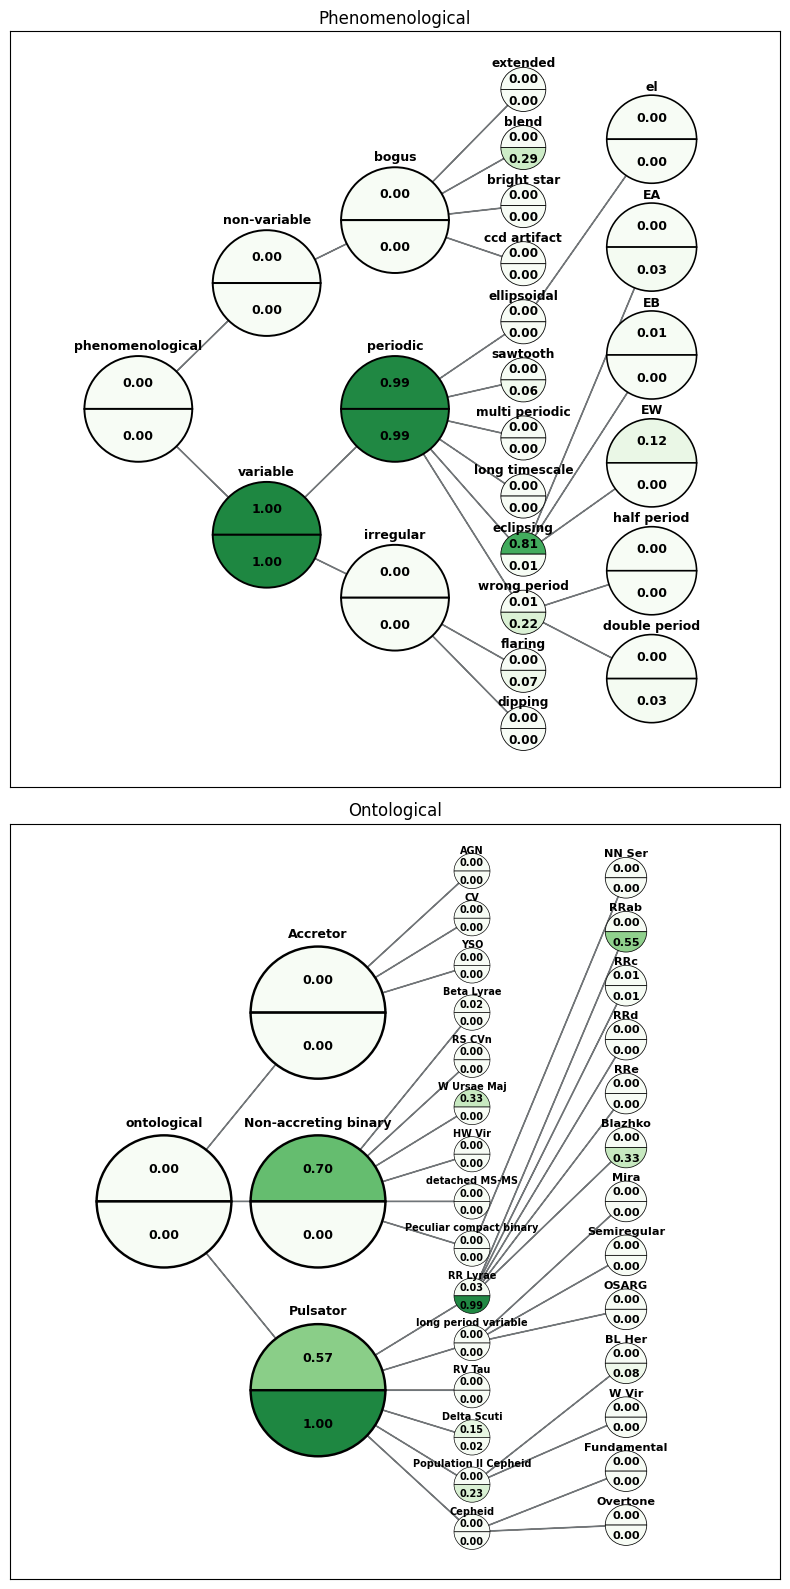

In [13]:
from class_plot import *
import yaml
with open('./all_tax.yaml') as config_yaml:
    full_tree = yaml.load(config_yaml, Loader=yaml.FullLoader)
copy_tree=copy.deepcopy(full_tree)
# get just the Phenomenological tree
ph_tree=copy_tree['children'][0]
# get just the Ontological tree
on_tree=copy_tree['children'][1]
fig,axs=plt.subplots(2,figsize=(8,16))

s_ph={'skip_text':False,'cm':"Greens"}
s_on={'skip_text':False,'cm':"Greens"}
axs[0].set_title('Phenomenological')
plot_classifications(axs[0],out_data,ph_tree,sep=.3,settings=s_ph)
axs[1].set_title('Ontological')
plot_classifications(axs[1],out_data,on_tree,sep=.3,settings=s_on)
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
plt.tight_layout()

## 6. <a id="6"></a>CMD
here is an example using the client to make a cmd

In [14]:
# Retrive some data
fields=[500]
periodic={'$and':[
                    {'pnp_dnn':{'$gt':.7}},
                    {'pnp_xgb':{'$gt':.7}}
                ]
            }
non_periodic={'$and':[
                    {'pnp_dnn':{'$lt':.4}},
                    {'pnp_xgb':{'$lt':.4}}
                ]
            }

periodic_data=C.search_by_classification(fields,filter_stage=periodic)
non_periodic_data=C.search_by_classification(fields,filter_stage=non_periodic)

In [ ]:
periodic_data=periodic_data[periodic_data['Gaia_EDR3___id']!=np.nan]
non_periodic_data=non_periodic_data[non_periodic_data['Gaia_EDR3___id']!=np.nan]


periodic_data['Abs_g_mag']=periodic_data["Gaia_EDR3__phot_g_mean_mag"] + 5.0 * np.log10(periodic_data["Gaia_EDR3__parallax"] / 1000)
non_periodic_data['Abs_g_mag']=non_periodic_data["Gaia_EDR3__phot_g_mean_mag"] + 5.0 * np.log10(non_periodic_data["Gaia_EDR3__parallax"] / 1000)

#keep only significant parallax
final_periodic=periodic_data[periodic_data["Gaia_EDR3__parallax"]/periodic_data['Gaia_EDR3__parallax_error']>3]
final_non_periodic=non_periodic_data[non_periodic_data["Gaia_EDR3__parallax"]/non_periodic_data['Gaia_EDR3__parallax_error']>3]


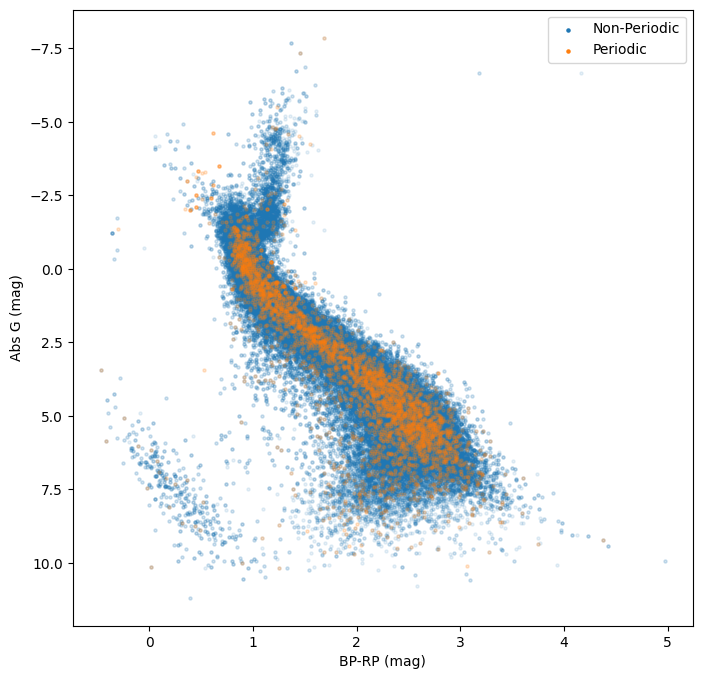

In [21]:
fig,ax= plt.subplots(figsize=(8,8))
ax.scatter(final_non_periodic['Gaia_EDR3__phot_bp_mean_mag']-final_non_periodic['Gaia_EDR3__phot_rp_mean_mag'],final_non_periodic['Abs_g_mag'],label='Non-Periodic',s=5,alpha=.1)
ax.scatter(final_periodic['Gaia_EDR3__phot_bp_mean_mag']-final_periodic['Gaia_EDR3__phot_rp_mean_mag'],final_periodic['Abs_g_mag'],label='Periodic',s=5,alpha=.2)
ax.set_xlabel('BP-RP (mag)')
ax.set_ylabel('Abs G (mag)')
l=ax.legend()
for lh in l.legend_handles: 
    lh.set_alpha(1)
ax.invert_yaxis()
